In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

In [6]:
df_patient = pd.read_csv("data/coronavirus/patient.csv")

In [7]:
df_patient.head(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released


In [8]:
df_patient.isna().sum()

id                     0
sex                 5345
birth_year          5358
country                1
region              5357
group               5683
infection_reason    5620
infection_order     5731
infected_by         5696
contact_number      5716
confirmed_date         1
released_date       5728
deceased_date       5743
state                  1
dtype: int64

In [12]:
#filling birth_year with mean value
df_patient['birth_year'] = df_patient.birth_year.fillna(df_patient.birth_year.mean()).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)


In [16]:
#we are grouping patients based on the confirmed date, which indicates patient is suffering from the corona virus 
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).id.count()

In [17]:
df_patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


Text(0.5, 1.0, 'Daily confirmed Count')

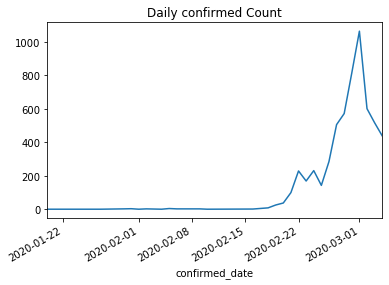

In [18]:
#Daily confirmed count
daily_count.plot()
plt.title("Daily confirmed Count")

In [19]:
df_patient['age'] = 2020 - df_patient['birth_year']

In [20]:
dead = df_patient[df_patient.state == 'deceased']
dead

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
37,38,female,1963,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57
53,54,male,1963,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57
54,55,male,1961,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59
103,104,male,1957,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63
106,107,male,1953,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67
113,114,male,1946,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased,74
204,205,female,1965,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased,55
285,286,male,1958,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased,62
297,298,male,1962,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased,58
442,443,male,1979,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaN,2020-02-22,deceased,41


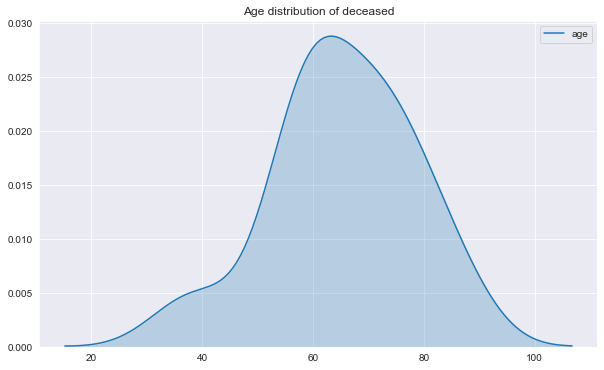

In [24]:
#plotting the age distribution of death 
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of deceased")
sns.kdeplot(data=dead['age'], shade=True)

 The peoples between the age 40-80 is the highest number deceased by corona virus.
 
 Next, we have to find the number of males and females

In [26]:
male_dead = dead[dead.sex == 'male']
female_dead = dead[dead.sex == 'female']

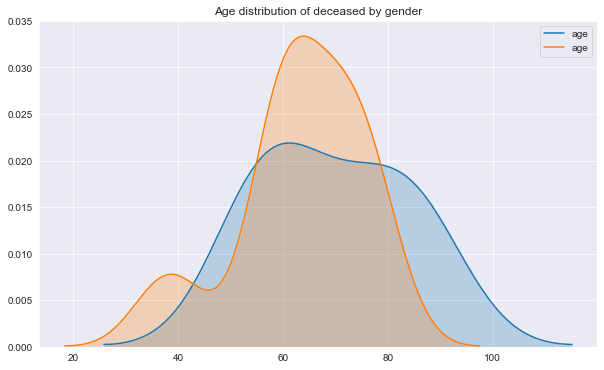

In [29]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of deceased by gender")
sns.kdeplot(data=female_dead['age'], shade=True) #orange
sns.kdeplot(data=male_dead['age'], shade=True)

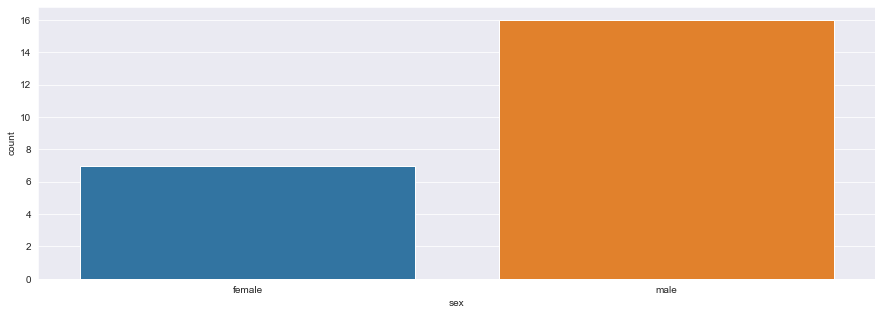

In [43]:
#male and female count plot
plt.figure(figsize=(15,5))
sns.countplot(x = 'sex', data = dead);

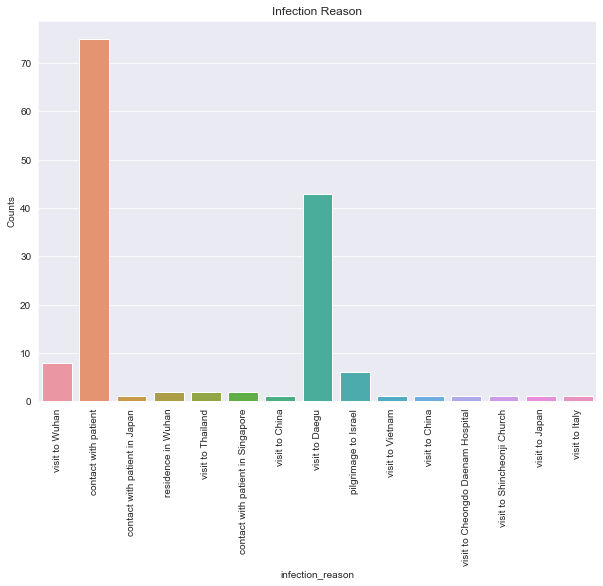

In [49]:
plt.figure(figsize = (10, 7))
plt.title('Infection Reason')
sns.countplot(x = 'infection_reason', data = df_patient)
plt.xlabel('infection_reason')
plt.ylabel('Counts')
plt.xticks(rotation = 90);

In [37]:
df_route = pd.read_csv("data/coronavirus/route.csv")
df_route.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


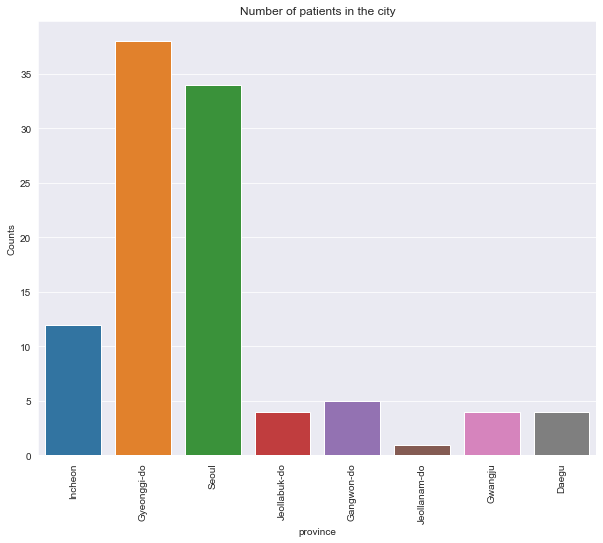

In [48]:
plt.figure(figsize = (10, 8))
plt.title('Number of patients in the city')
sns.countplot(x = 'province', data = df_route)
plt.xlabel('province')
plt.ylabel('Counts')
plt.xticks(rotation = 90);

In [50]:
data = daily_count.resample('D').first().fillna(0).cumsum()
data = data[20:]
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

In [56]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_ = model.fit(x,y)

In [57]:
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [66]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['Current Confirmed Count', 'Predictd Confirmed Count'])
plt.show()

NameError: name 'accumulated_count' is not defined